### Let's start by importing necessary libraries

In [1]:
#!pip install xgboost

In [2]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#!pip install xlrd

### Read the dataset

In [5]:
data = pd.read_csv("/content/drive/MyDrive/dataset (2).txt")
df = data.copy()


### View the first and last 5 rows of the dataset.

In [6]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [7]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [8]:
data.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
151,50,Male,1.6,0.8,218,18,20,5.9,2.9,0.96,1
262,18,Male,0.8,0.2,228,55,54,6.9,4.0,1.30,1
482,45,Male,1.1,0.4,92,91,188,7.2,3.8,1.11,1
398,38,Male,0.8,0.2,208,25,50,7.1,3.7,1.00,1
359,69,Female,0.8,0.2,146,42,70,8.4,4.9,1.40,2
334,13,Female,0.7,0.2,350,17,24,7.4,4.0,1.10,1
168,60,Male,22.8,12.6,962,53,41,6.9,3.3,0.90,1
332,26,Male,7.1,3.3,258,80,113,6.2,2.9,0.80,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


## Understand the shape of the dataset.

In [9]:
data.shape

(583, 11)

- The dataset has got 583 rows and 11 columns

### Check the data types of the columns for the dataset.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          583 non-null    int64  
 1    Gender                      583 non-null    object 
 2    Total_Bilirubin             583 non-null    float64
 3    Direct_Bilirubin            583 non-null    float64
 4    Alkaline_Phosphotase        583 non-null    int64  
 5    Alamine_Aminotransferase    583 non-null    int64  
 6    Aspartate_Aminotransferase  583 non-null    int64  
 7    Total_Protiens              583 non-null    float64
 8    Albumin                     583 non-null    float64
 9    Albumin_and_Globulin_Ratio  583 non-null    float64
 10   Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


- The dataset is of type integer, float and object which occupies 50.2KB

#### Fixing the data types

In [11]:
cols = data.select_dtypes(['object'])
cols.columns

Index([' Gender'], dtype='object')

In [12]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Age                          583 non-null    int64   
 1    Gender                      583 non-null    category
 2    Total_Bilirubin             583 non-null    float64 
 3    Direct_Bilirubin            583 non-null    float64 
 4    Alkaline_Phosphotase        583 non-null    int64   
 5    Alamine_Aminotransferase    583 non-null    int64   
 6    Aspartate_Aminotransferase  583 non-null    int64   
 7    Total_Protiens              583 non-null    float64 
 8    Albumin                     583 non-null    float64 
 9    Albumin_and_Globulin_Ratio  583 non-null    float64 
 10   Dataset                     583 non-null    int64   
dtypes: category(1), float64(5), int64(5)
memory usage: 46.4 KB


### Summary of the dataset.

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total_Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct_Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline_Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate_Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin_and_Globulin_Ratio,583.0,0.940566,0.327962,0.0,0.7,0.92,1.1,2.8
Dataset,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [15]:
data.describe(include=['category']).T

,count,unique,top,freq
Gender,583,2,Male,441


**Let's look at the unqiue values of all the categories**

In [16]:
cols_cat= data.select_dtypes(['category'])

In [17]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in  Gender are :
 Gender
Male      441
Female    142
Name: count, dtype: int64
**************************************************


## Exploratory Data Analysis (EDA)

### Univariate analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.

### Numerical Columns

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

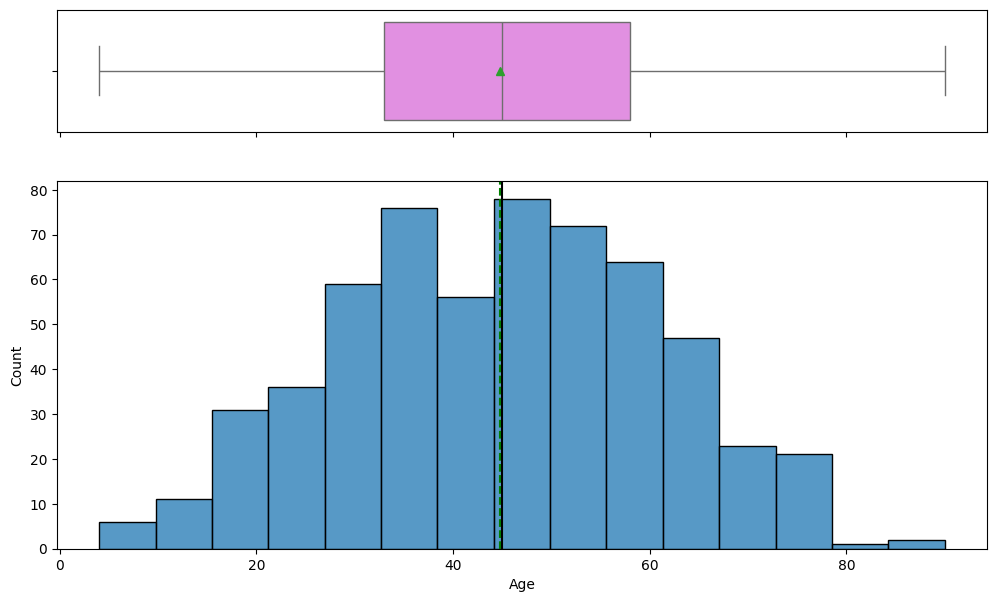

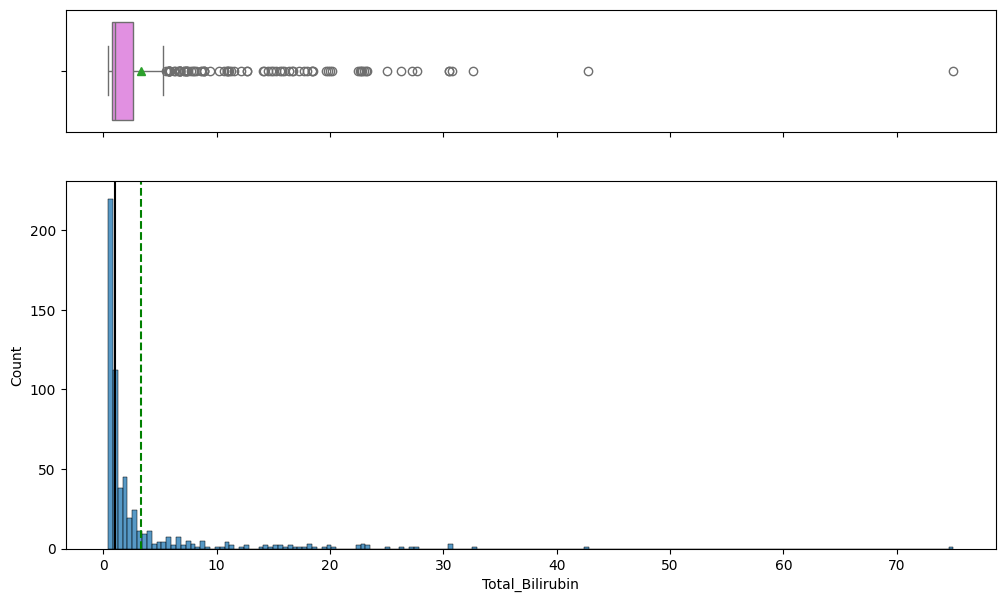

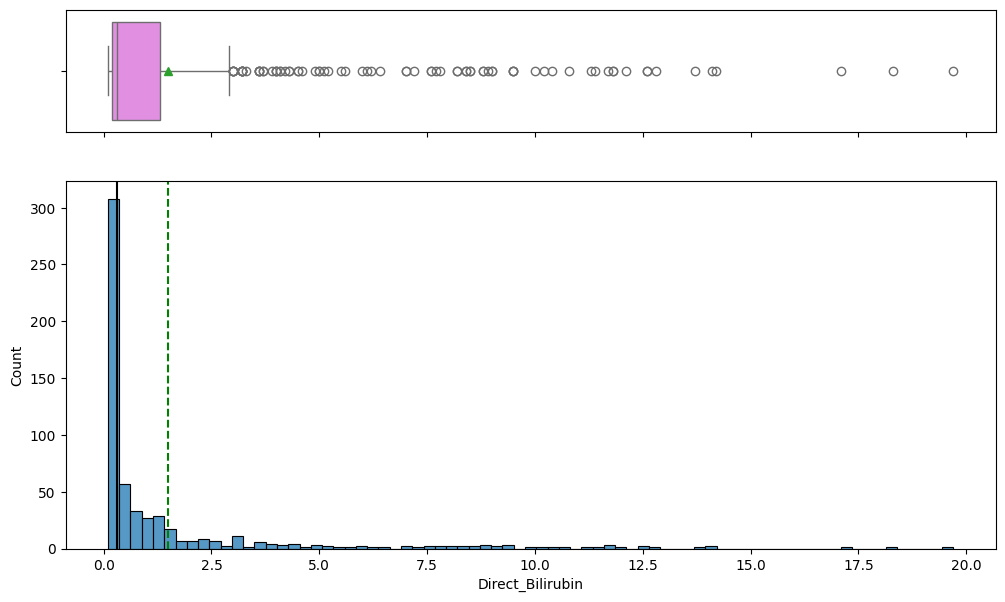

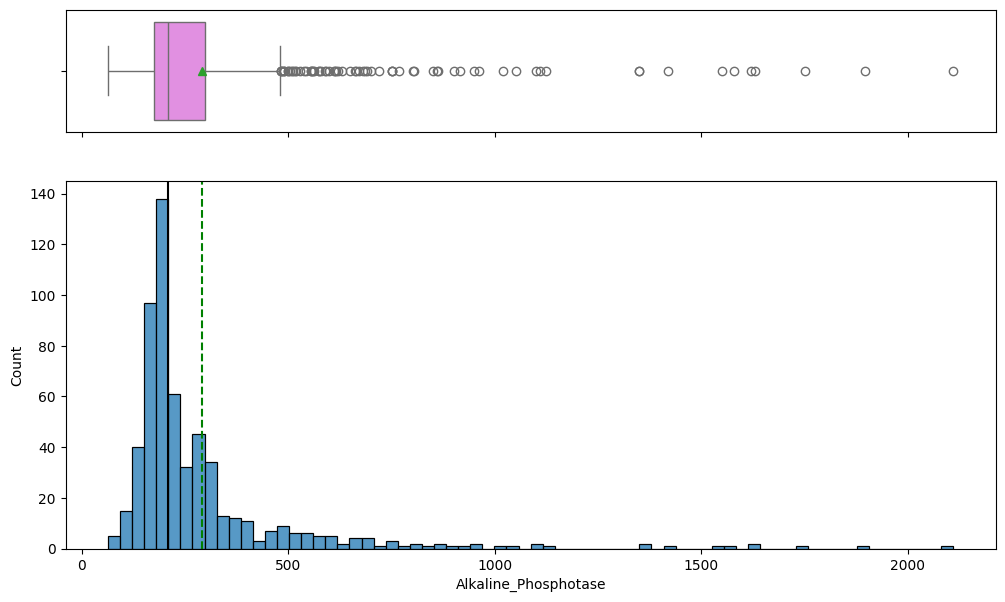

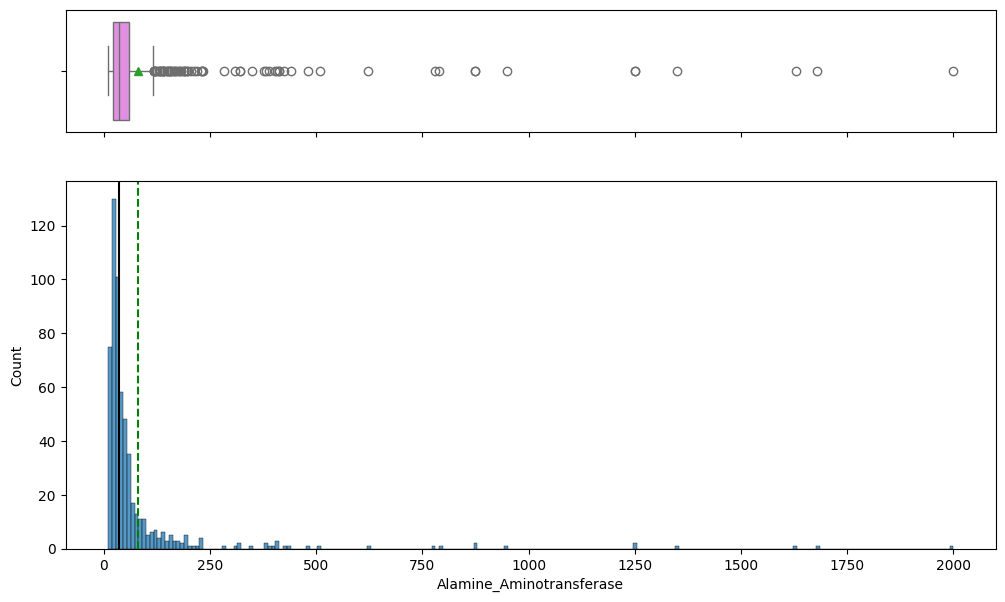

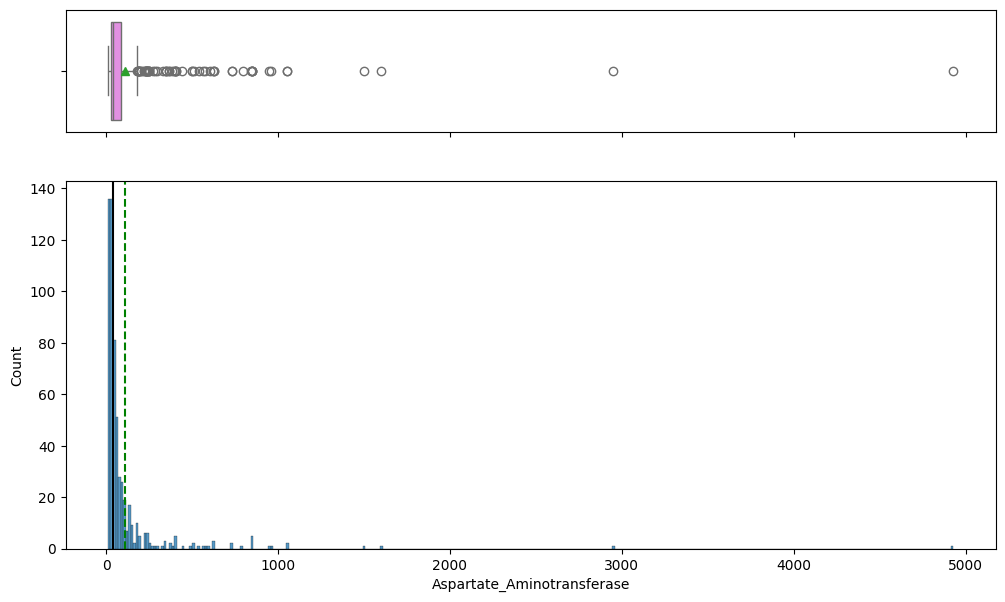

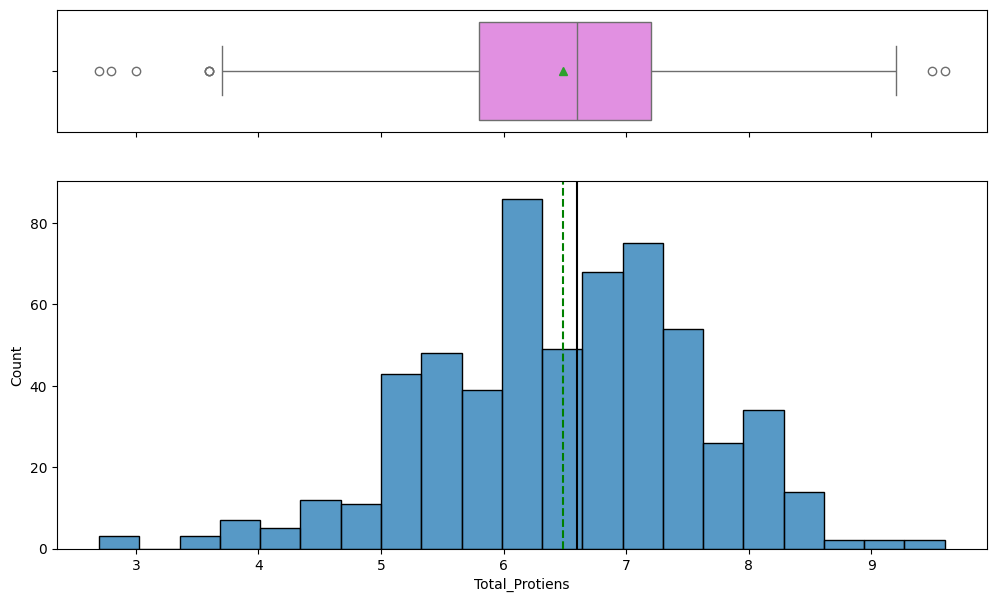

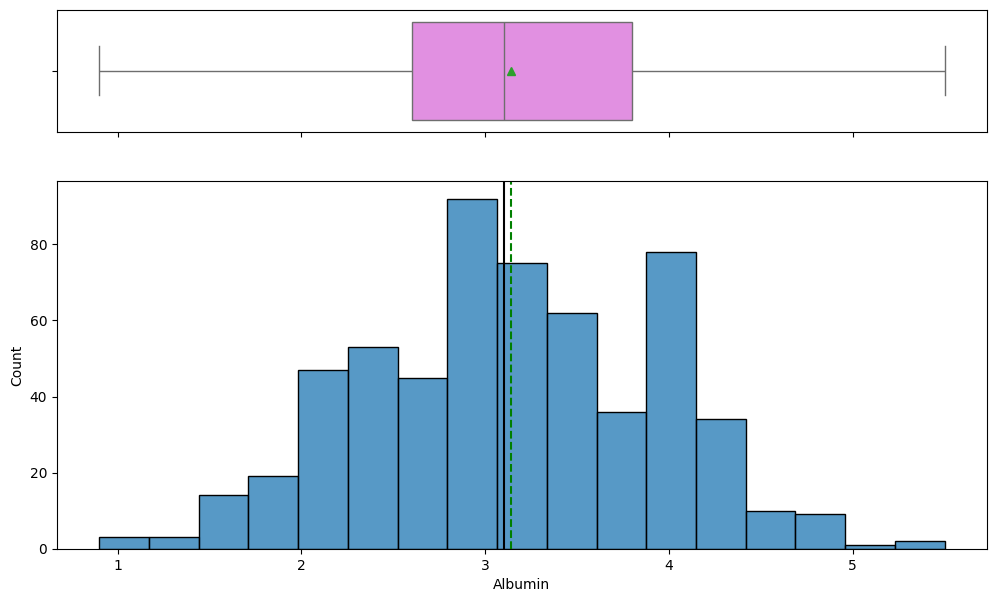

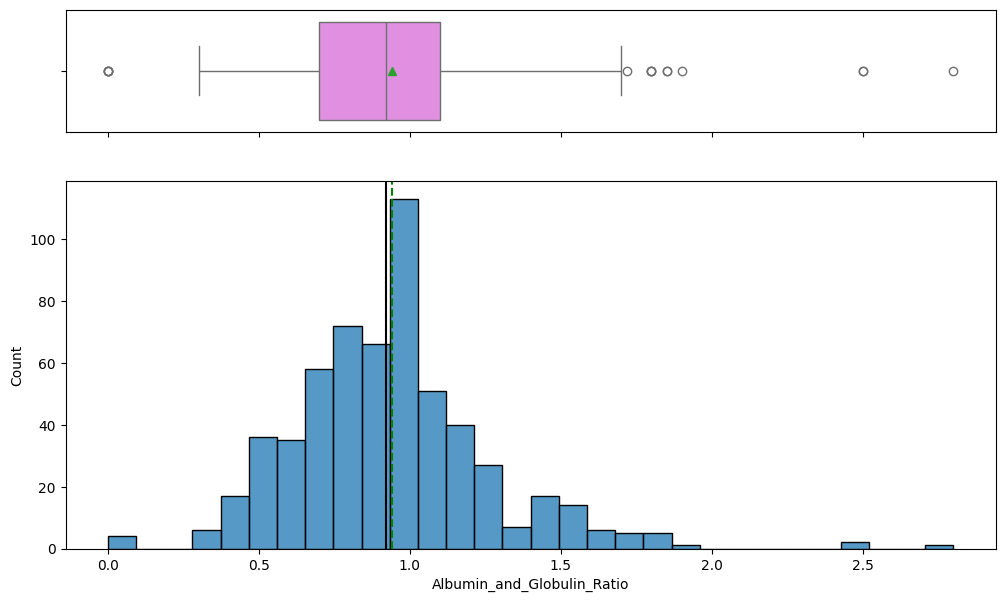

In [19]:
# Strip leading and trailing spaces from all column names
df.columns = df.columns.str.strip()
# Select only numerical columns, excluding the 'Dataset' column
numerical_columns = df.select_dtypes(include=['number']).columns.drop('Dataset')

# Loop through the remaining numerical columns and generate the plots
for feature in numerical_columns:
    histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None)


### Categorical Columns

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on Gender

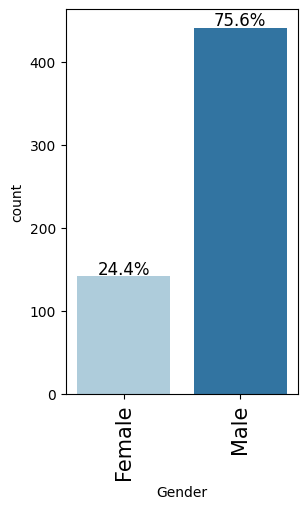

In [21]:
labeled_barplot(df, "Gender", perc=True)

- The patients from the male gender(75.6%) were more compared to females (24.4%)

### Observations on AwayTeam

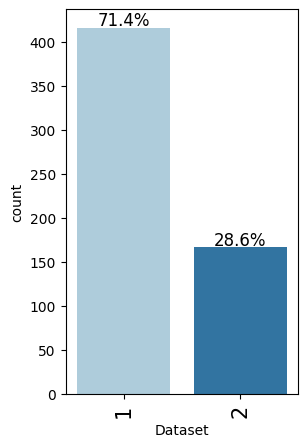

In [22]:
labeled_barplot(df, "Dataset", perc=True)

- There were more patients with liver disease(71.4%) as compared to those without liver disease(28.6%).

## Bivariate And Multivariate Analysis

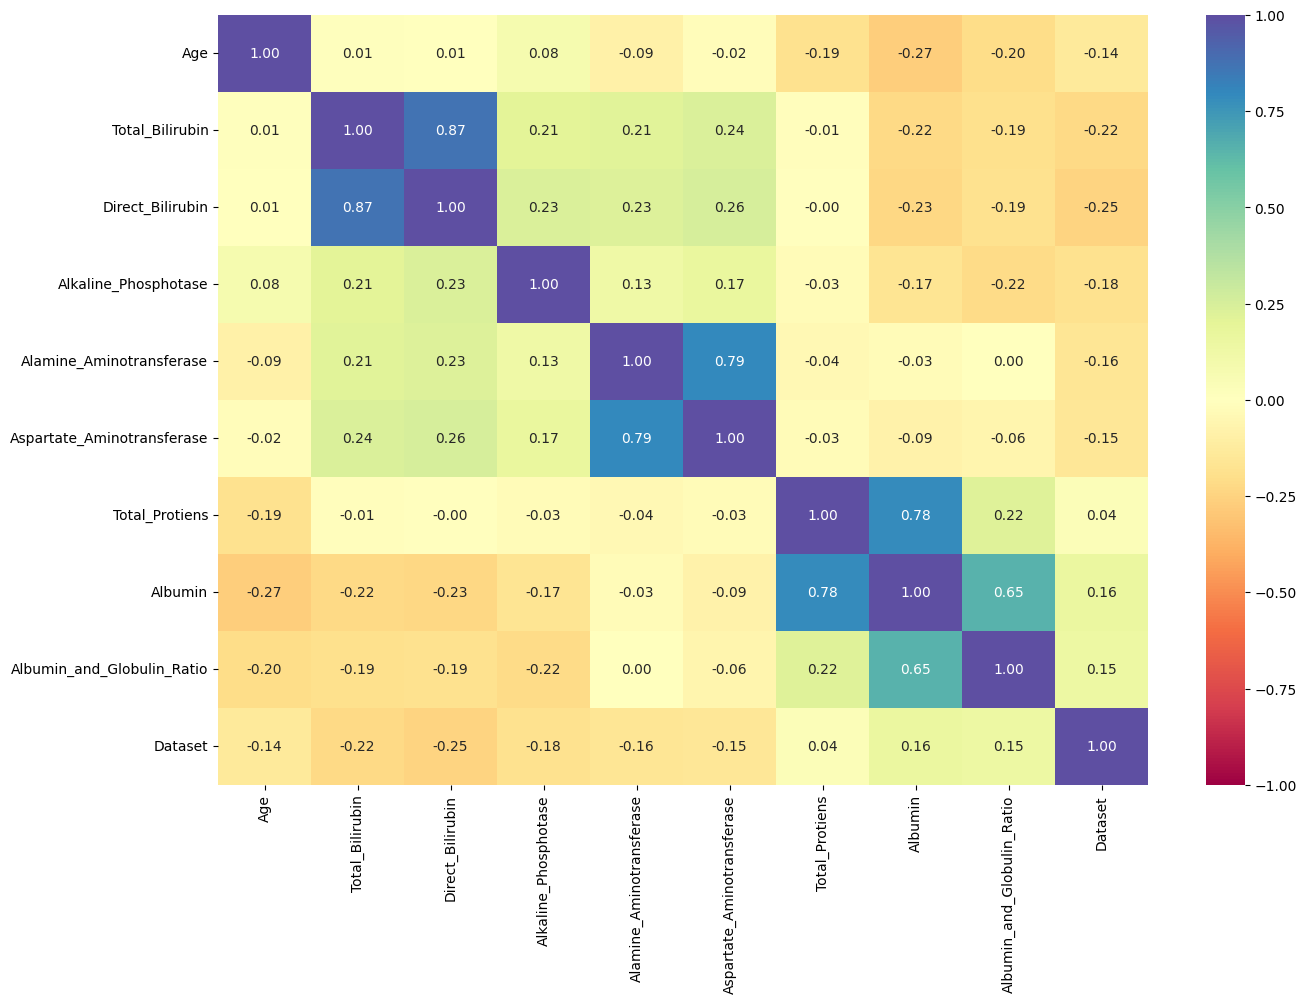

In [23]:
# Selecting only the numeric columns
numeric_df = df.select_dtypes(include='number')

# Plotting the heatmap with the correlation matrix of the numeric data
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(),vmin=-1, vmax=1, annot=True, fmt='.2f',cmap="Spectral")
plt.show()

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [24]:
df.duplicated().sum()

13

- There are 13 duplicate values which we will drop.

In [25]:
# Removing duplicates
data.drop_duplicates(keep=False, inplace=True)

In [26]:
df.isnull().sum()

,0
Age,0
Gender,0
Total_Bilirubin,0
Direct_Bilirubin,0
Alkaline_Phosphotase,0
Alamine_Aminotransferase,0
Aspartate_Aminotransferase,0
Total_Protiens,0
Albumin,0
Albumin_and_Globulin_Ratio,0


In [27]:
# we first create a copy of the data to avoid changes to it
df = df.copy()

### Outlier Check

- Let's check for outliers in the data.

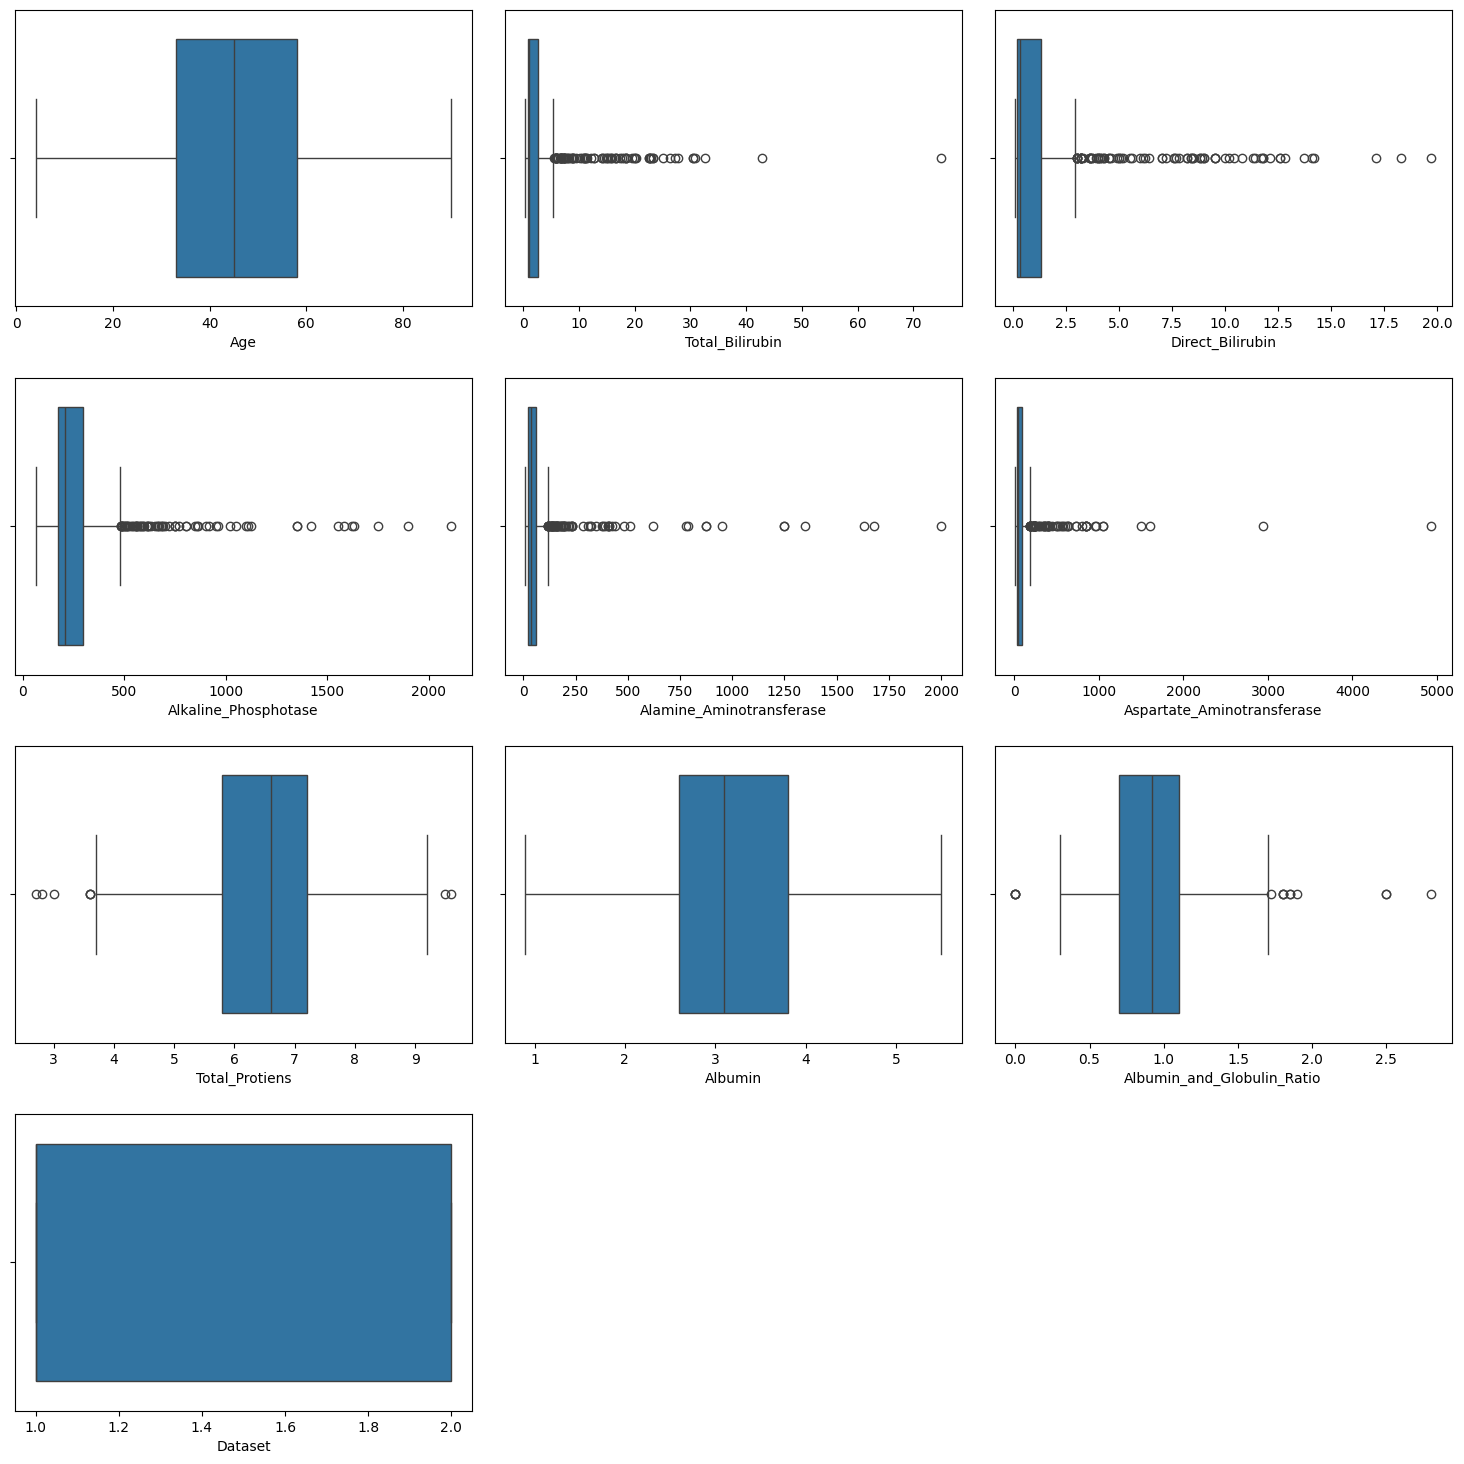

In [28]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.tight_layout(pad=2)

plt.show()

### Treating Outliers

In [29]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

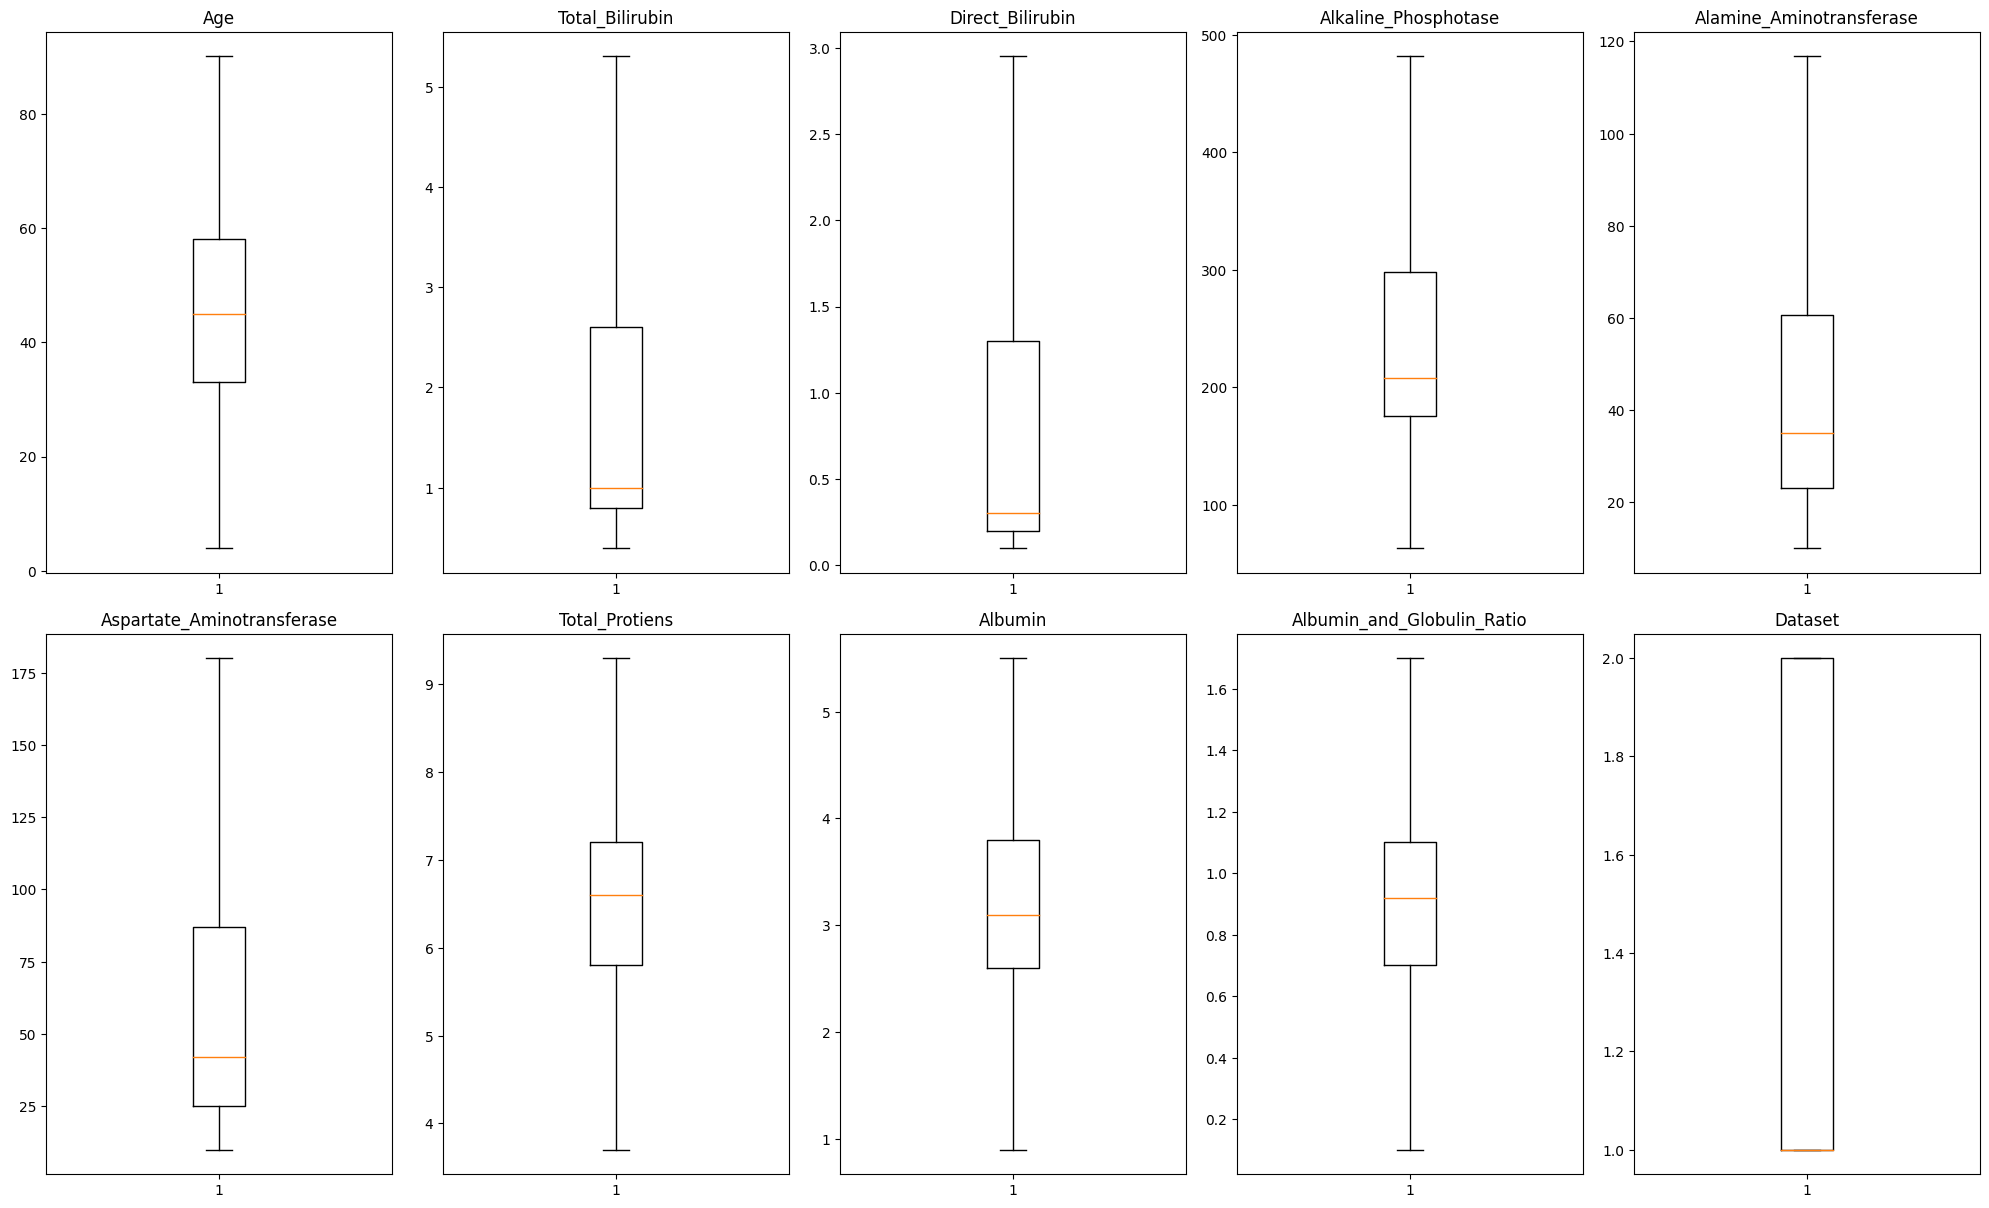

In [30]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
df = treat_outliers_all(df, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 5, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Feature Engineering

In [31]:
# Replace 2 with 0 in the 'Dataset' column
df['Dataset'] = df['Dataset'].replace(2, 0)

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Build model on the train data.
4. Tune the model if required.
5. Test the data on test set.

## Split Data

* When classification problems exhibit a significant imbalance in the distribution of the target classes, it is good to use stratified sampling to ensure that relative class frequencies are approximately preserved in train and test sets.
* This is done using the `stratify` parameter in the train_test_split function.

In [32]:
X = df.drop(['Dataset'], axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df['Dataset'].apply(lambda x: 1 if x == 1 else 0)


In [33]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Gender_Male
0,65,0.7,0.10,187.00,16.0,18,6.8,3.3,0.90,False
1,62,5.3,2.95,481.75,64.0,100,7.5,3.2,0.74,True
2,62,5.3,2.95,481.75,60.0,68,7.0,3.3,0.89,True
3,58,1.0,0.40,182.00,14.0,20,6.8,3.4,1.00,True
4,72,3.9,2.00,195.00,27.0,59,7.3,2.4,0.40,True


In [34]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(466, 10) (117, 10)


In [35]:
y.value_counts(1)

,proportion
Dataset,
1,0.713551
0,0.286449


In [36]:
y_test.value_counts(1)

,proportion
Dataset,
1,0.709402
0,0.290598


### Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the there is presence of liver disease to a patient but in reality, there is no liver disease.

2. Model predicts that there is no liver disease but in reality, there is presence of liver disease.

### Which case is more important?
* Both the cases are important as:

* If it predicts there is presence of liver disease but in reality there is no liver disease the hospital can allocate resources for the  purchase of liver disease drugs where there is no liver disease detected thus leading to waste of resources.

* If it predicts there is no liver disease but in reality there is presence of liver disease, it might cause the desrving cases where the hospital is supposed to allocate resources for drug purchase to miss the allocation.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score, the higher the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [37]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [38]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.17,1:0.83} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [39]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.17,1:0.83},random_state=1)

In [40]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, random_state=1)

#### Checking model performance on training set

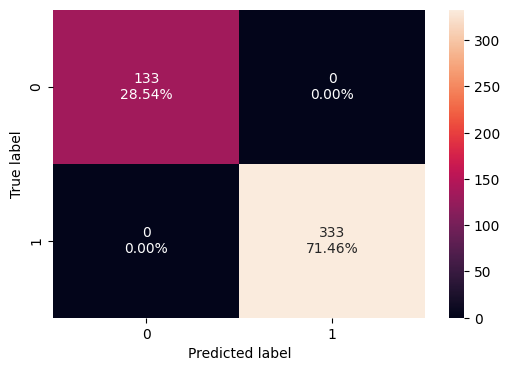

In [41]:
confusion_matrix_sklearn(dtree, X_train, y_train)

**Confusion Matrix -**

* There is presence of liver disease and the model predicted it correctly that there is presence of liver disease :  True Positive (observed=1,predicted=1)

* There was no liver disease and the model predicted there is presence of liver disease : False Positive (observed=0,predicted=1)

* There was no liver disease and the model predicted that there was no liver disease : True Negative (observed=0,predicted=0)

* There is presence of liver disease  and the model predicted it incorrectly that there is no liver disease : False Negative (observed=1,predicted=0)

In [42]:
dtree_model_train_perf = model_performance_classification_sklearn(dtree, X_train, y_train)
print("Training performance \n", dtree_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

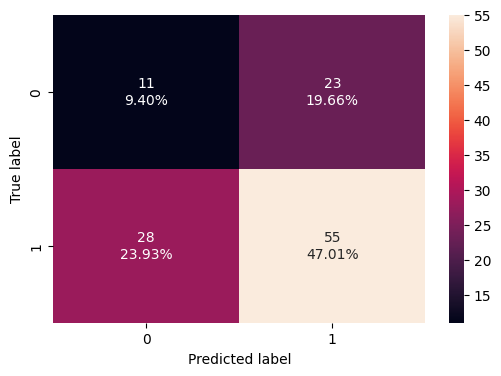

In [43]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [44]:
dtree_model_test_perf=model_performance_classification_sklearn(dtree, X_test, y_test)
print("Testing performance \n",dtree_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision       F1
0  0.564103  0.662651   0.705128  0.68323


- There is no overfitting on the training data as both acuuracy, recall, precision and F1 for both training and testing data are equal. Therefore decision tree is working well for both training and testing data.

**Before pruning the tree let's check the important features.**

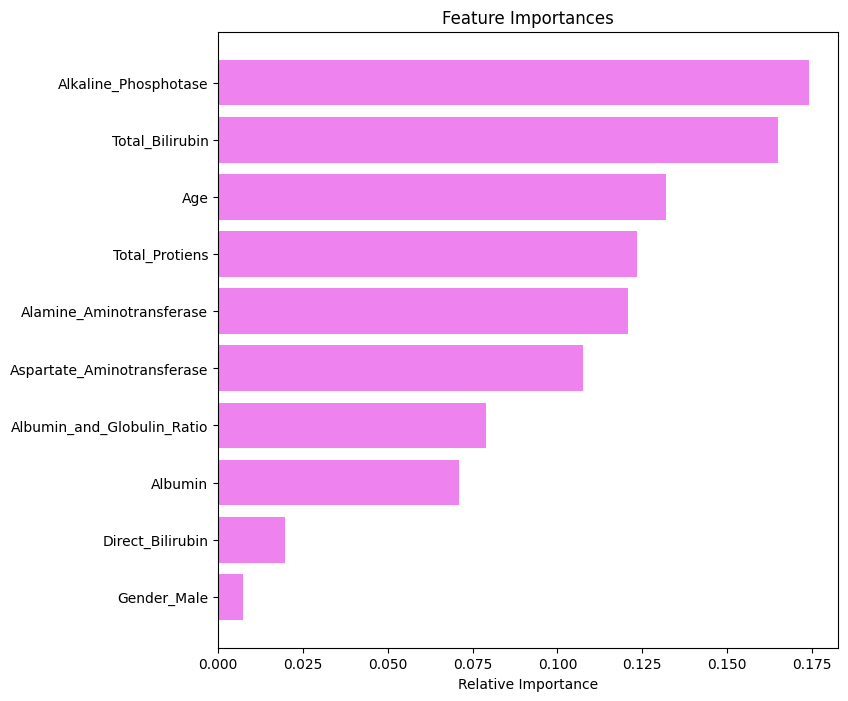

In [45]:
feature_names = list(X_train.columns)
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Pruning the tree

**Pre-Pruning**

In [46]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight="balanced")

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=50,
                       min_samples_split=50, random_state=1)

#### Checking performance on training set

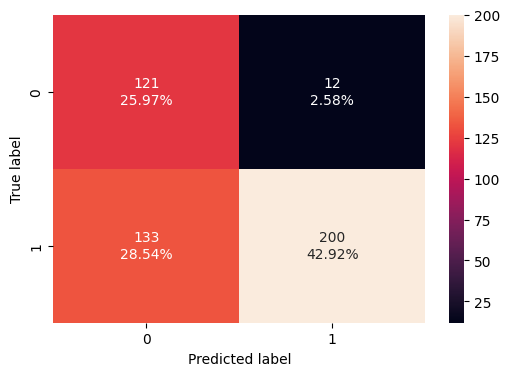

In [47]:
 #Training Performance
confusion_matrix_sklearn(estimator, X_train, y_train)

In [48]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.688841,0.600601,0.943396,0.733945


#### Checking performance on test set

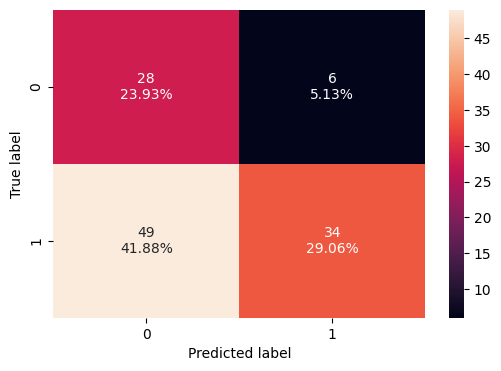

In [49]:
# Testing Performance
confusion_matrix_sklearn(estimator, X_test, y_test)

In [50]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.688841,0.600601,0.943396,0.733945


- After pruning the accuracy, recall and F1 reduced for the training data but increased for testing data

### Visualizing the Decision Tree

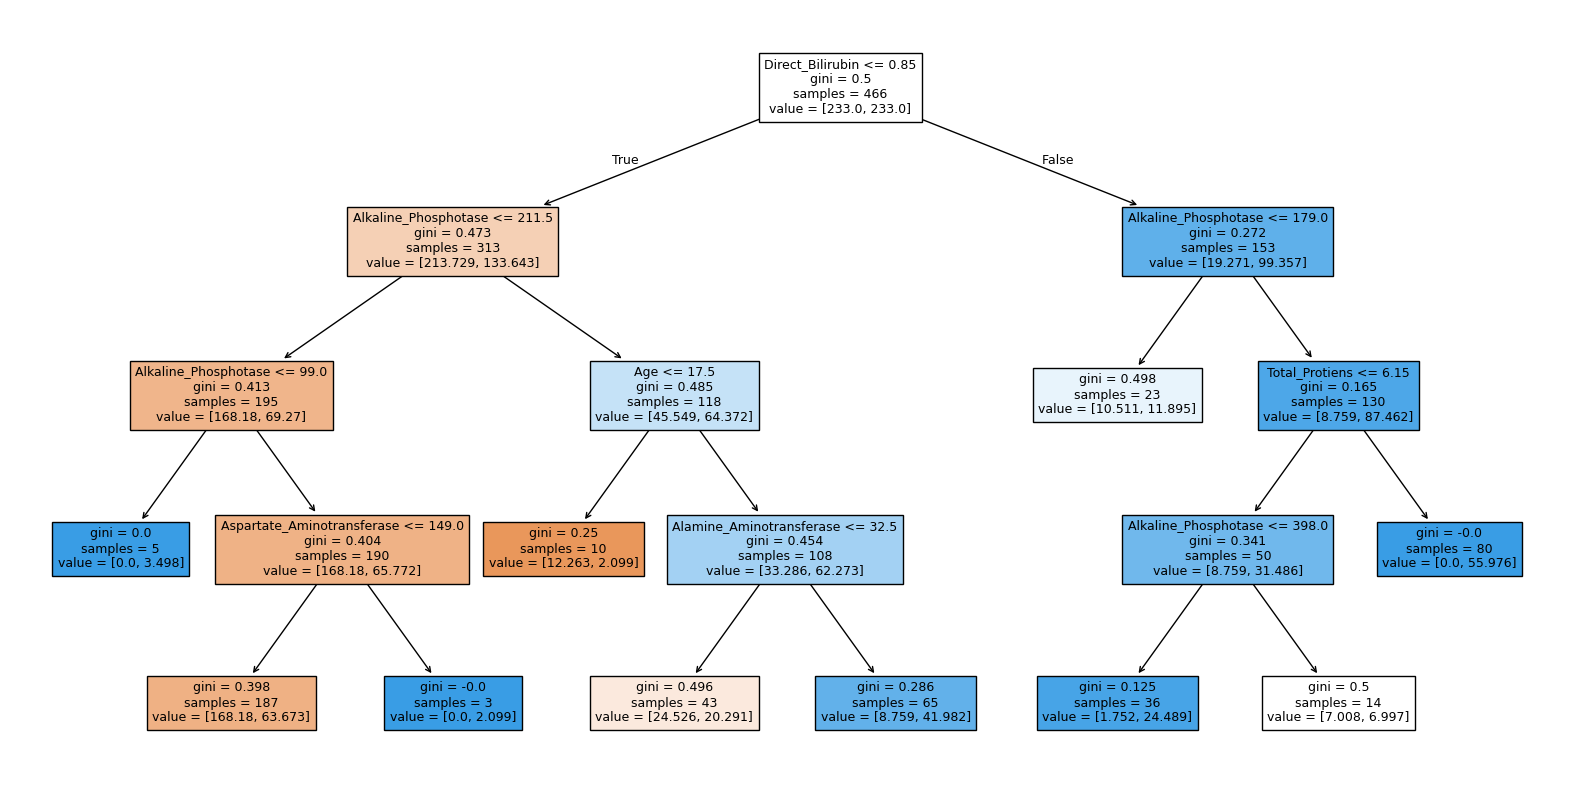

In [51]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- The above is the decision tree that will help us to come with a decision if there is space or not. The root node in this case which will guide in decision making is the paremeter no capacity. If the sample satisfies the condition then it goes to the left i f it exists otherwise it goes to the right.  

In [52]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Direct_Bilirubin <= 0.85
|   |--- Alkaline_Phosphotase <= 211.50
|   |   |--- Alkaline_Phosphotase <= 99.00
|   |   |   |--- weights: [0.00, 3.50] class: 1
|   |   |--- Alkaline_Phosphotase >  99.00
|   |   |   |--- Aspartate_Aminotransferase <= 149.00
|   |   |   |   |--- weights: [168.18, 63.67] class: 0
|   |   |   |--- Aspartate_Aminotransferase >  149.00
|   |   |   |   |--- weights: [0.00, 2.10] class: 1
|   |--- Alkaline_Phosphotase >  211.50
|   |   |--- Age <= 17.50
|   |   |   |--- weights: [12.26, 2.10] class: 0
|   |   |--- Age >  17.50
|   |   |   |--- Alamine_Aminotransferase <= 32.50
|   |   |   |   |--- weights: [24.53, 20.29] class: 0
|   |   |   |--- Alamine_Aminotransferase >  32.50
|   |   |   |   |--- weights: [8.76, 41.98] class: 1
|--- Direct_Bilirubin >  0.85
|   |--- Alkaline_Phosphotase <= 179.00
|   |   |--- weights: [10.51, 11.89] class: 1
|   |--- Alkaline_Phosphotase >  179.00
|   |   |--- Total_Protiens <= 6.15
|   |   |   |--- Alkaline_Phosphotase <

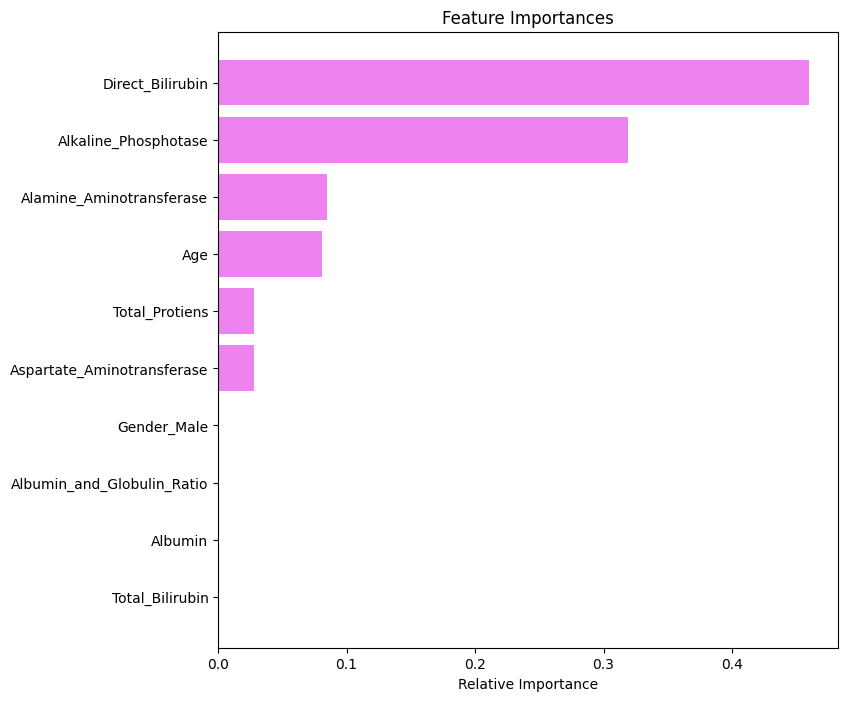

In [53]:
# importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Important features for the prediction after the tree is pruned are:no capacity, Murang'a south and good status.

### Cost Complexity Pruning
**Let's try pruning the tree and see if the performance improves.**

In [54]:
d_tree = DecisionTreeClassifier(random_state=0)
path = d_tree.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [55]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.001416,0.004247
2,0.001839,0.007925
3,0.001907,0.011740
4,0.001931,0.015603
5,0.001981,0.019565
6,0.002012,0.023588
7,0.002044,0.027676
8,0.002097,0.031870
9,0.002861,0.034731


In [56]:
clfs_list = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs_list.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs_list[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 3 with ccp_alpha: 0.04460160466225871


In [57]:
#Fitting model for each value of alpha and saving the train recall in a list
recall_train=[]
for clf in clfs_list:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    recall_train.append(values_train)

In [58]:
#Fitting model for each value of alpha and saving the test recall in a list
recall_test=[]
for clf in clfs_list:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    recall_test.append(values_test)

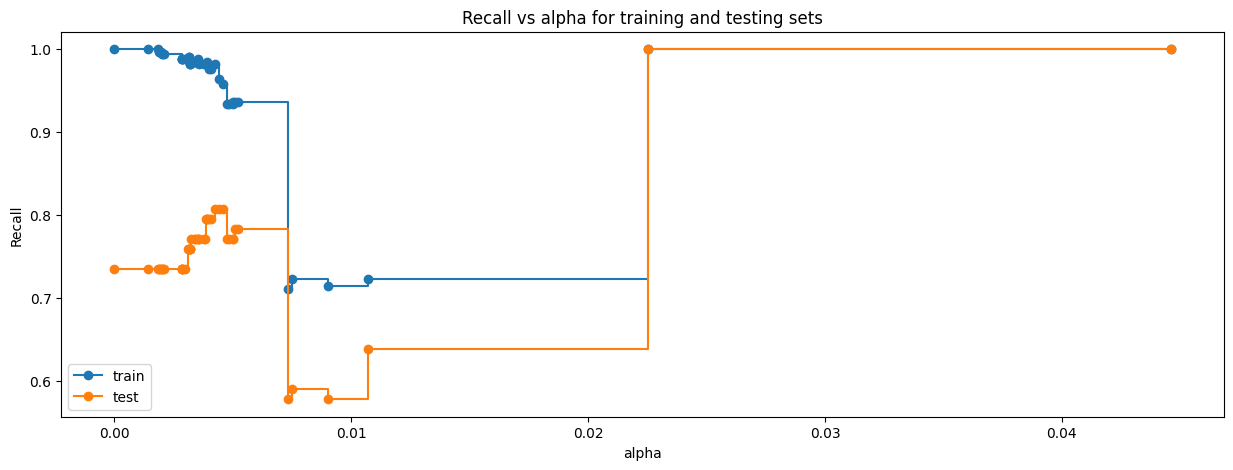

In [59]:
#Plotting the graph for Recall VS alpha
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

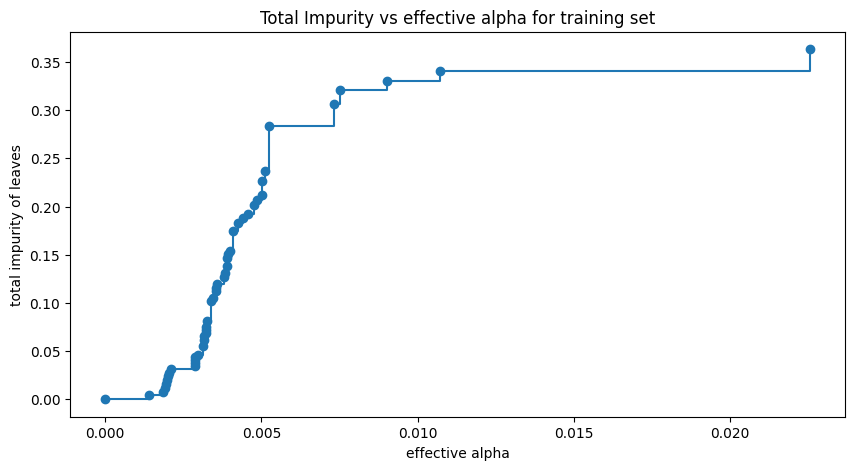

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

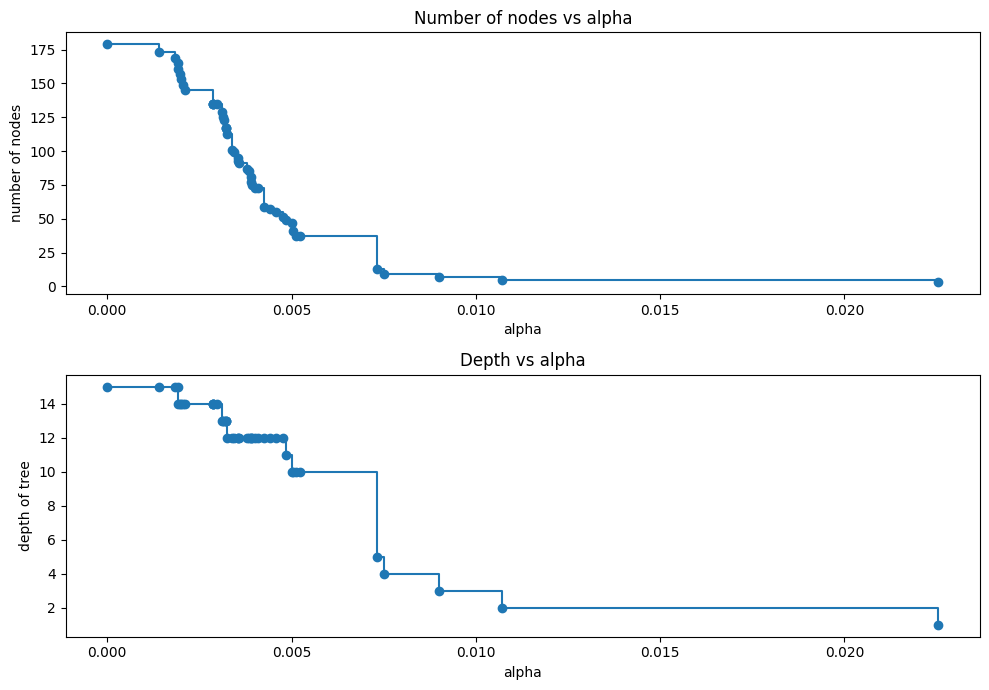

In [61]:
clfs = clfs_list[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Training performance:
    Accuracy  Recall  Precision        F1
0  0.714592     1.0   0.714592  0.833542
Testing performance:
    Accuracy  Recall  Precision    F1
0  0.709402     1.0   0.709402  0.83


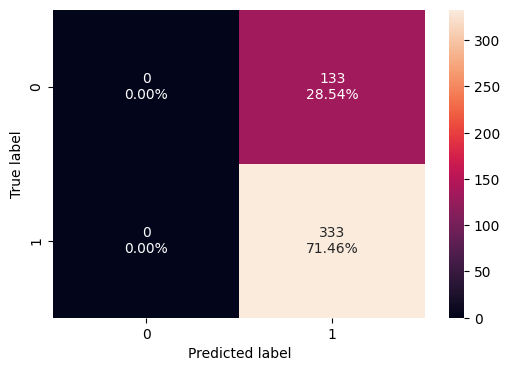

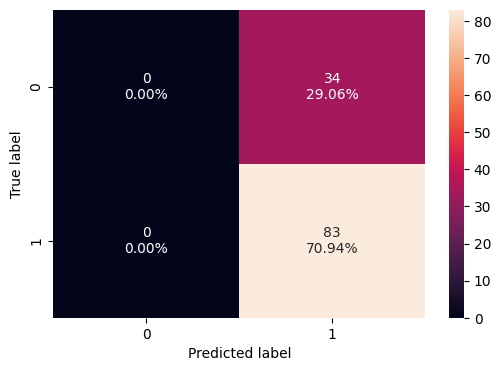

In [62]:
# Creating the model where we get highest test recall
index_best_pruned_model = np.argmax(recall_test)

pruned_dtree_model = clfs_list[index_best_pruned_model]

# Calculating different metrics
pruned_dtree_model_train_perf = model_performance_classification_sklearn(
    pruned_dtree_model, X_train, y_train
)
print("Training performance:\n", pruned_dtree_model_train_perf)
pruned_dtree_model_test_perf = model_performance_classification_sklearn(
    pruned_dtree_model, X_test, y_test
)
print("Testing performance:\n", pruned_dtree_model_test_perf)

# Creating confusion matrix
confusion_matrix_sklearn(pruned_dtree_model, X_train, y_train)
confusion_matrix_sklearn(pruned_dtree_model, X_test, y_test)

- After complexity pruning accuracy and F1 remained the same while recall increased and precision decreased for the training data.

- Recall and F1 increased while accuracy and precision decreased for the training data.

### F1 Score vs alpha for training and testing sets

In [63]:
f1_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = f1_score(y_train, pred_train)
    f1_train.append(values_train)

f1_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = f1_score(y_test, pred_test)
    f1_test.append(values_test)

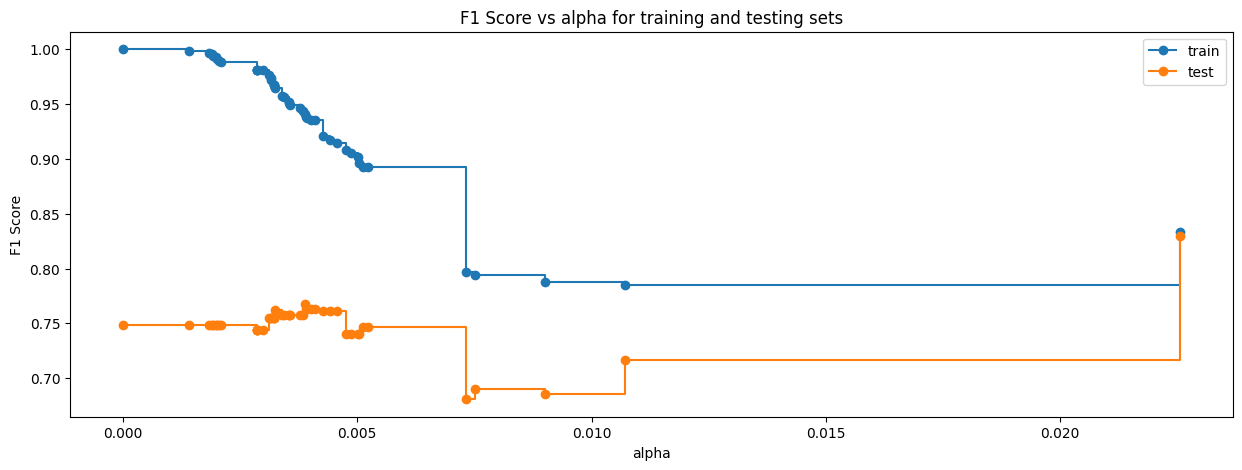

In [64]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [65]:
index_best_model = np.argmax(f1_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.022551038348255226, random_state=1)


#### Checking performance on training set

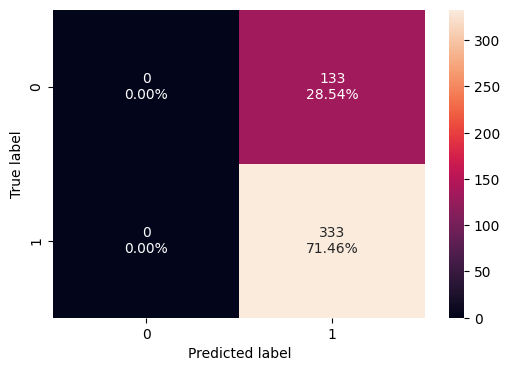

In [66]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [67]:
decision_tree_post_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.714592,1.0,0.714592,0.833542


#### Checking performance on test set

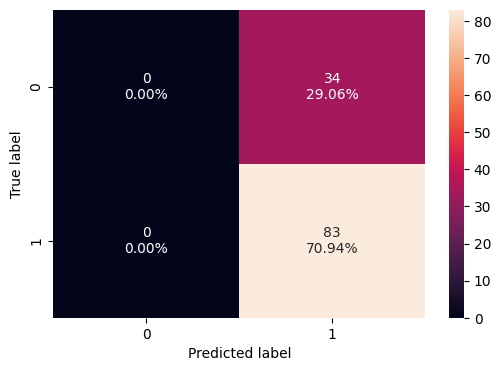

In [68]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [69]:
decision_tree_post_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_post_perf_test

,Accuracy,Recall,Precision,F1
0,0.709402,1.0,0.709402,0.83


- No overfitting for F1 and alpha in our training and test sets

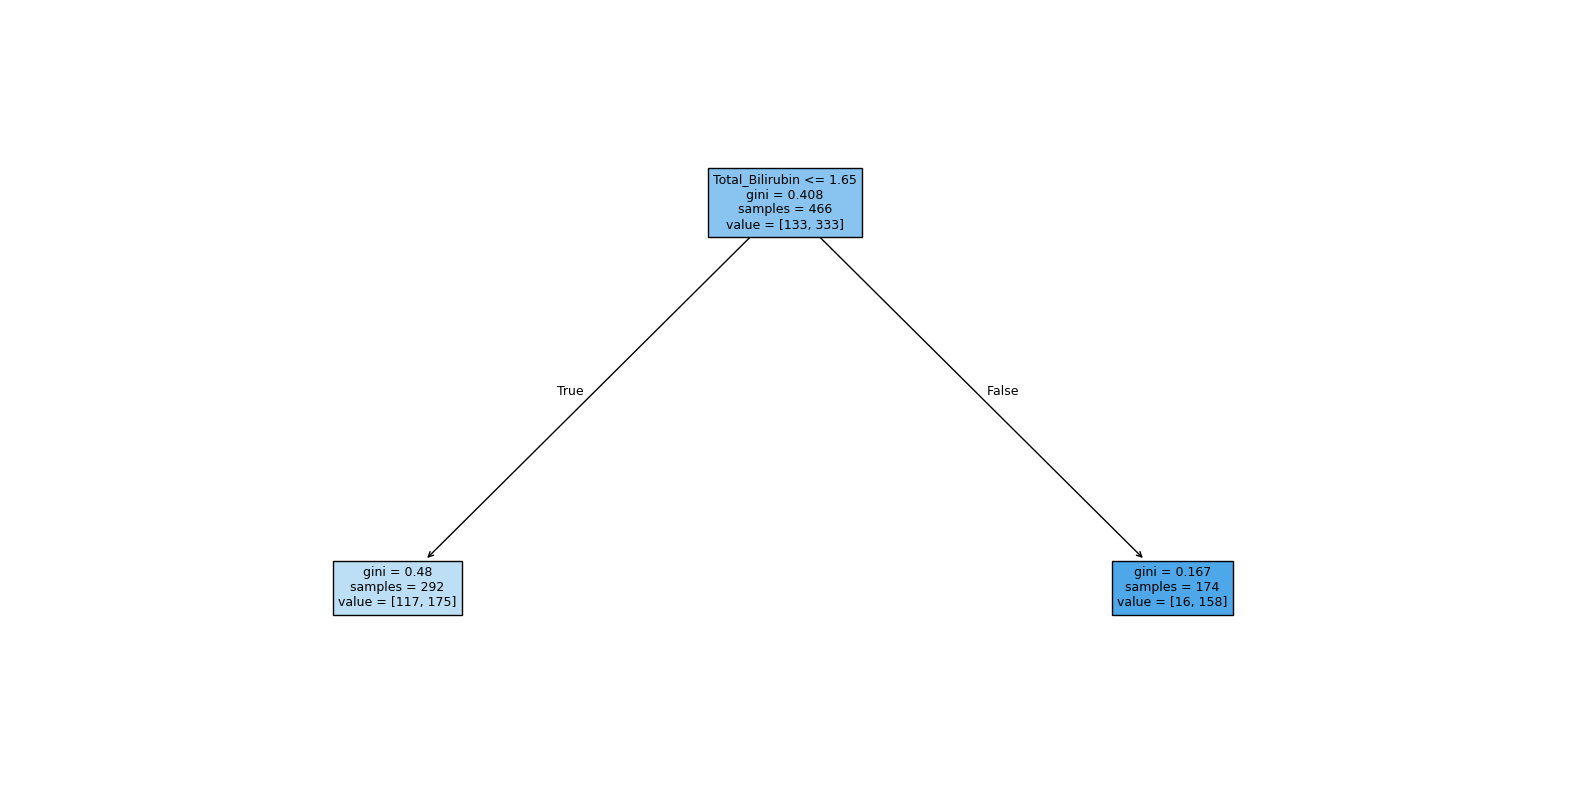

In [70]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- Our tree after complexity training.

In [71]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Total_Bilirubin <= 1.65
|   |--- weights: [117.00, 175.00] class: 1
|--- Total_Bilirubin >  1.65
|   |--- weights: [16.00, 158.00] class: 1



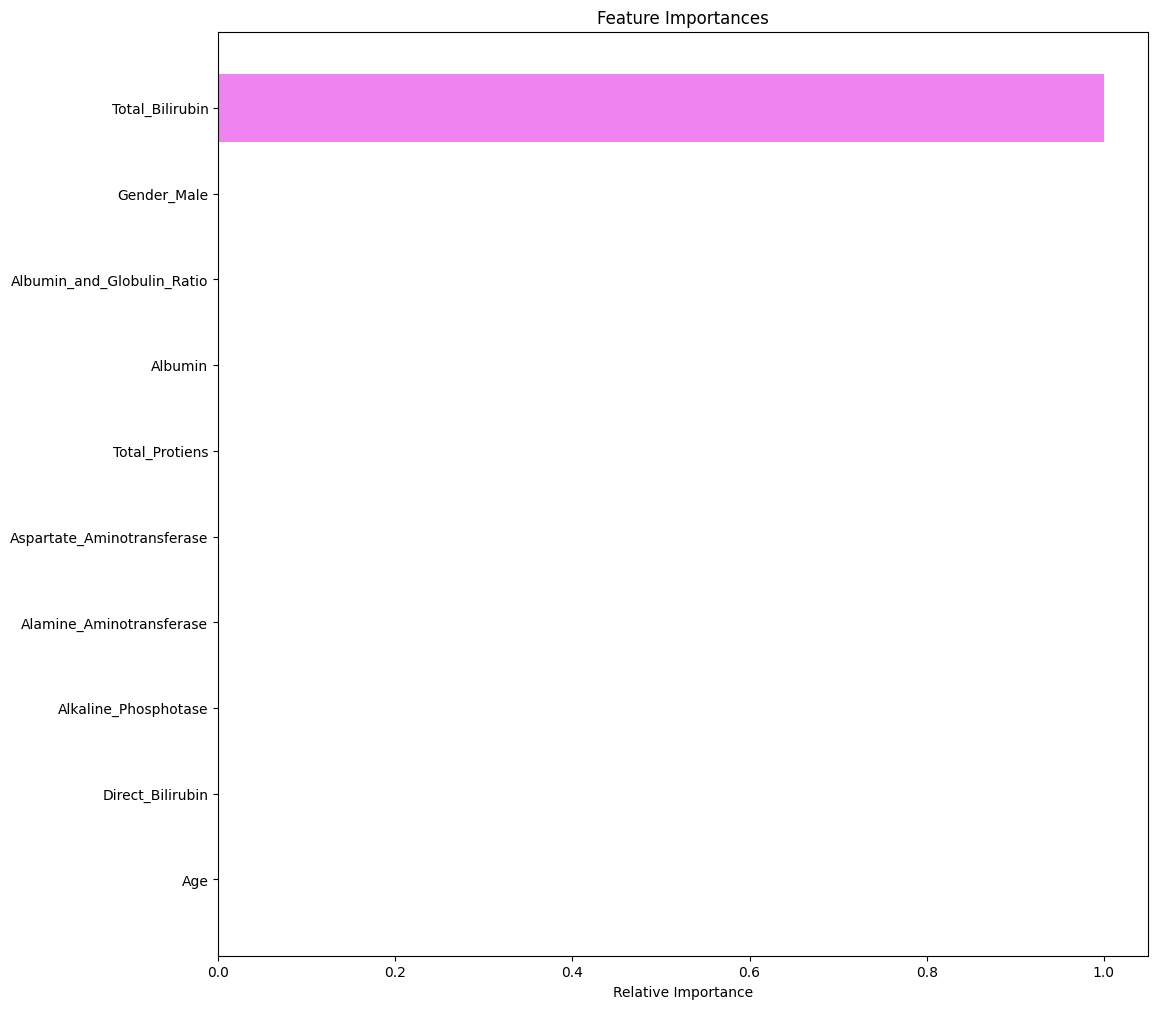

In [72]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- After complex pruning has got only two important features that would be used for prediction.This features are:good status and no capacity.

### Hyperparameter Tuning

In [73]:
#Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.17,1:0.83},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30),
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.17, 1: 0.83}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

#### Checking model performance on training set

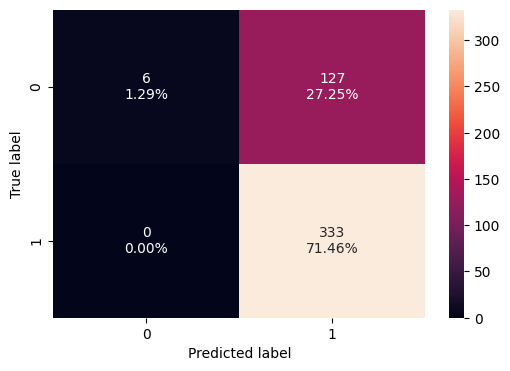

In [74]:
confusion_matrix_sklearn(dtree_estimator, X_train,y_train)

In [75]:
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, X_train,y_train)
print("Training performance \n",dtree_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.727468     1.0   0.723913  0.839849


#### Checking model performance on testing set

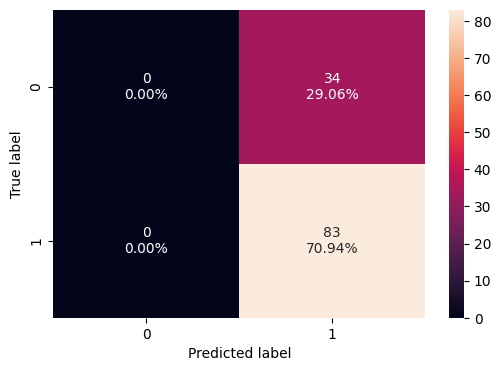

In [76]:
confusion_matrix_sklearn(dtree_estimator, X_test,y_test)

In [77]:
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
print("Testing performance \n",dtree_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0  0.709402     1.0   0.709402  0.83


- There is no overfitting on our training data after our model has been tuned.

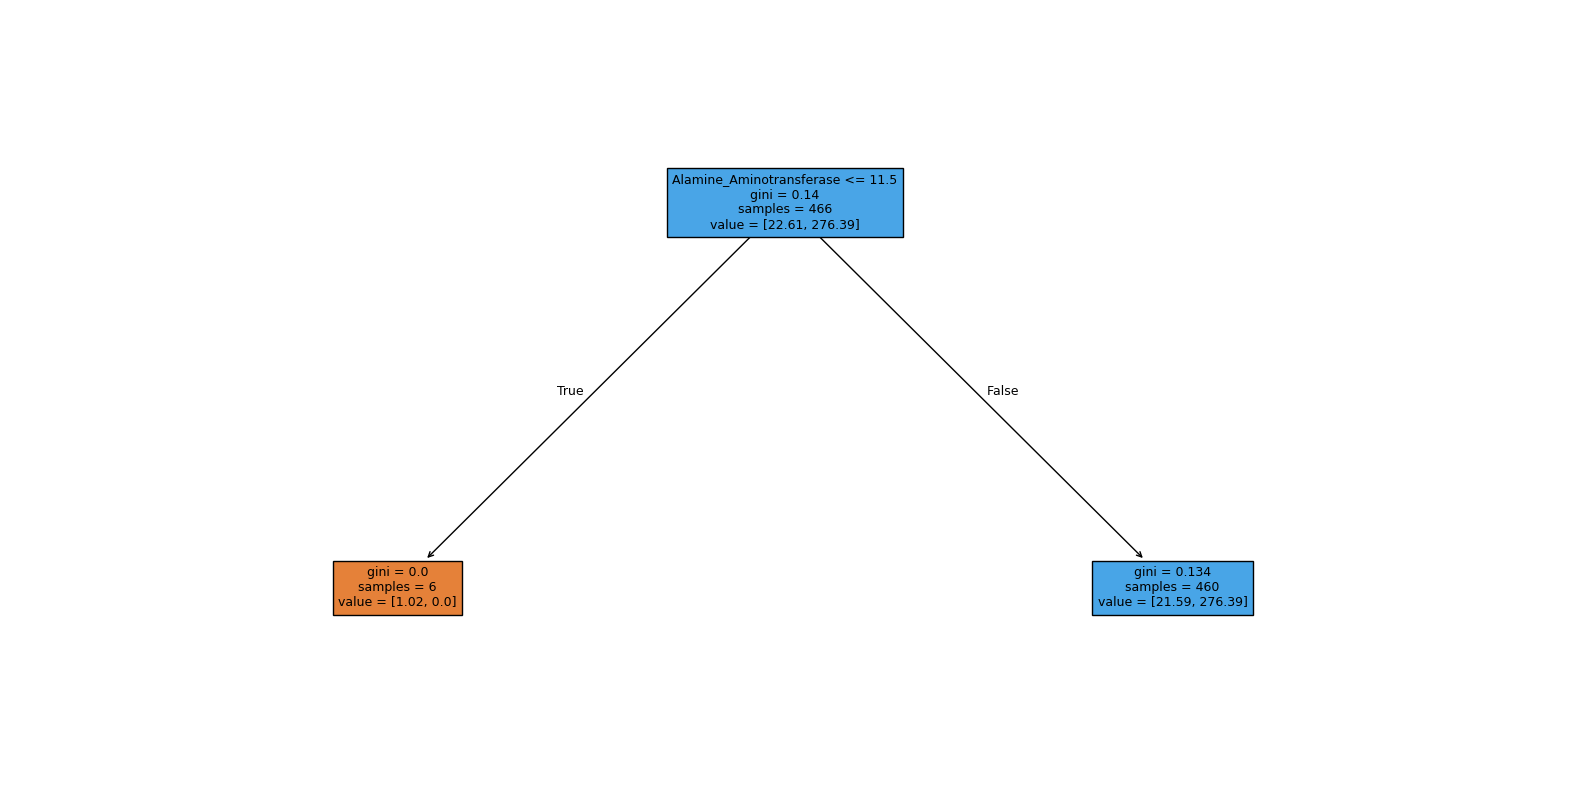

In [78]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    dtree_estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

- Our final tree after tuning the decision tree.

In [79]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dtree_estimator, feature_names=feature_names, show_weights=True))

|--- Alamine_Aminotransferase <= 11.50
|   |--- weights: [1.02, 0.00] class: 0
|--- Alamine_Aminotransferase >  11.50
|   |--- weights: [21.59, 276.39] class: 1



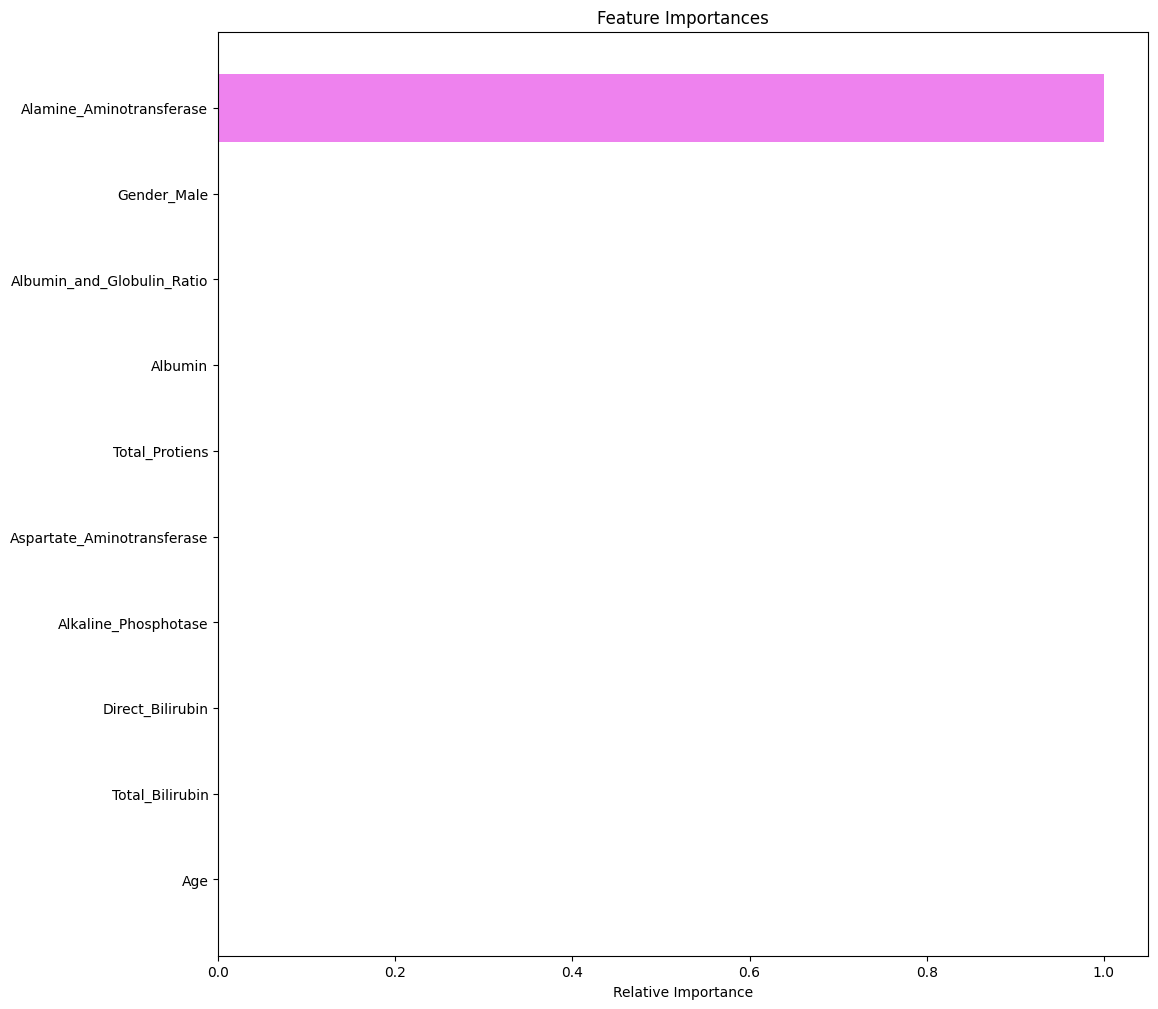

In [80]:
importances = dtree_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The tree has only remained with one important feature after tuning, this is no capacity.

### Bagging Classifier

In [81]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on training set

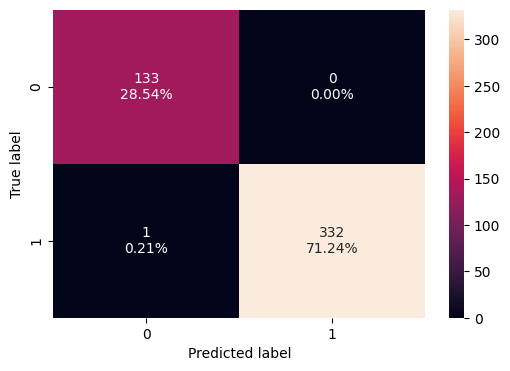

In [82]:
confusion_matrix_sklearn(bagging, X_train, y_train)

In [83]:
bagging_model_train_perf=model_performance_classification_sklearn(bagging, X_train, y_train)
print("Training performance \n",bagging_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.997854  0.996997        1.0  0.998496


#### Checking model performance on testing set

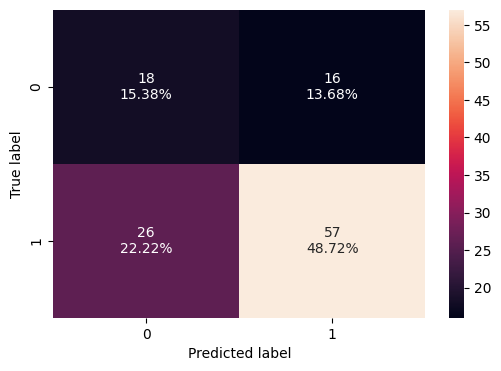

In [84]:
confusion_matrix_sklearn(bagging, X_test, y_test)

In [85]:
bagging_model_test_perf=model_performance_classification_sklearn(bagging, X_test, y_test)
print("Testing performance \n",bagging_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0  0.641026  0.686747   0.780822  0.730769


- No overfitting on the training data.

**Tuning Bagging Classifier**

In [86]:
cl1 = DecisionTreeClassifier(random_state=1)
param_grid = {
    'estimator': [cl1],  # Use 'estimator' instead of 'base_estimator'
    'n_estimators': [5, 7, 15, 51, 101],
    'max_features': [0.7, 0.8, 0.9, 1]
}

grid = GridSearchCV(BaggingClassifier(random_state=1, bootstrap=True), param_grid=param_grid, scoring='recall', cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=BaggingClassifier(random_state=1),
             param_grid={'estimator': [DecisionTreeClassifier(random_state=1)],
                         'max_features': [0.7, 0.8, 0.9, 1],
                         'n_estimators': [5, 7, 15, 51, 101]},
             scoring='recall')

In [87]:
## getting the best estimator
bagging_estimator  = grid.best_estimator_
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1),
                  max_features=1, n_estimators=51, random_state=1)

#### Checking model performance on training set

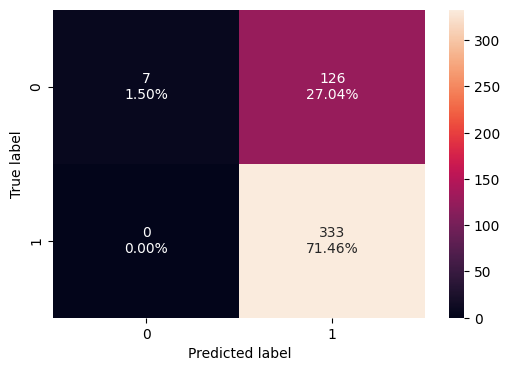

In [88]:
confusion_matrix_sklearn(bagging_estimator, X_train,y_train)

In [89]:
bagging_estimator_model_train_perf=model_performance_classification_sklearn(bagging_estimator, X_train,y_train)
print("Training performance \n",bagging_estimator_model_train_perf)

Training performance 
    Accuracy  Recall  Precision        F1
0  0.729614     1.0    0.72549  0.840909


#### Checking model performance on testing set

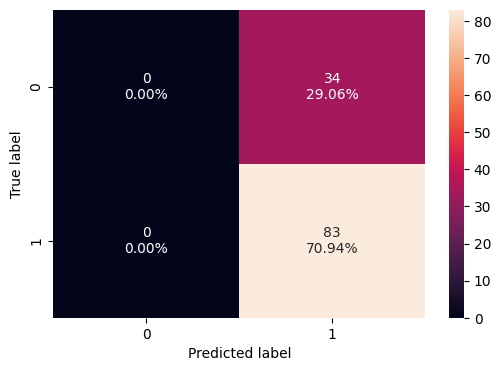

In [90]:
confusion_matrix_sklearn(bagging_estimator, X_test,y_test)

In [91]:
bagging_estimator_model_test_perf=model_performance_classification_sklearn(bagging_estimator, X_test, y_test)
print("Testing performance \n",bagging_estimator_model_test_perf)

Testing performance 
    Accuracy  Recall  Precision    F1
0  0.709402     1.0   0.709402  0.83


- The model still performed well after tuning.

### Random Forest

In [92]:
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking model performance on training set

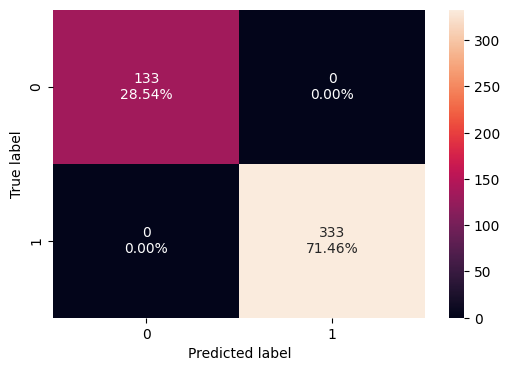

In [93]:
confusion_matrix_sklearn(rf,X_train,y_train)

In [94]:
rf_model_train_perf=model_performance_classification_sklearn(rf,X_train,y_train)
print("Training performance \n",rf_model_train_perf)

Training performance 
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


#### Checking model performance on testing set

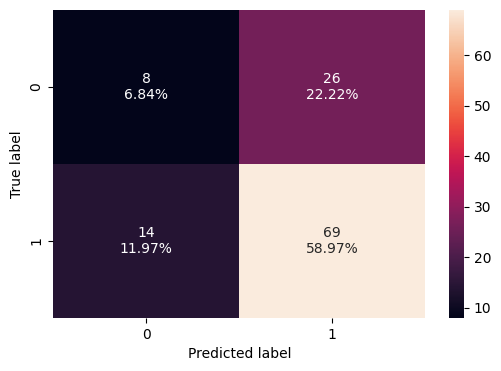

In [95]:
confusion_matrix_sklearn(rf,X_test,y_test)

In [96]:
rf_model_test_perf=model_performance_classification_sklearn(rf,X_test,y_test)
print("Testing performance \n",rf_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision        F1
0   0.65812  0.831325   0.726316  0.775281


- The model shows some slight overfitting on the train data

**Tuning Random Forest**

In [97]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
        "n_estimators": [110,251,501],
        "min_samples_leaf": np.arange(1, 6,1),
        "max_features": [0.7,0.9,'log2','auto'],
        "max_samples": [0.7,0.9,None],
}

# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, scoring='recall',cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_features=0.9, max_samples=0.7, min_samples_leaf=5,
                       n_estimators=110, random_state=1)

#### Checking model performance on training set

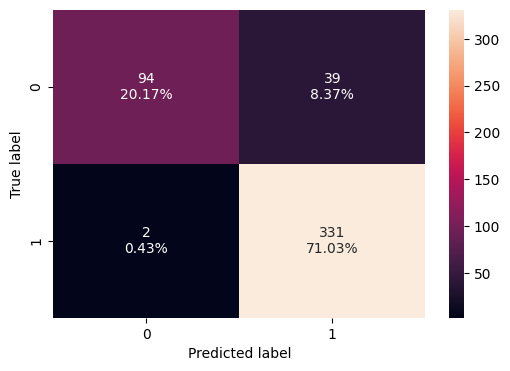

In [98]:
confusion_matrix_sklearn(rf_estimator, X_train,y_train)

In [99]:
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, X_train,y_train)
print("Training performance \n",rf_estimator_model_train_perf)

Training performance 
    Accuracy    Recall  Precision        F1
0  0.912017  0.993994   0.894595  0.941679


#### Checking model performance on testing set

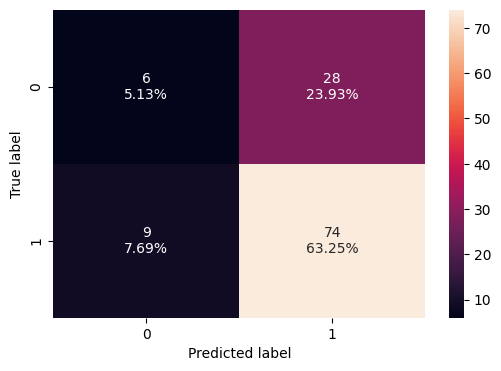

In [100]:
confusion_matrix_sklearn(rf_estimator, X_test,y_test)

In [101]:
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, X_test,y_test)
print("Testing performance \n",rf_estimator_model_test_perf)

Testing performance 
    Accuracy    Recall  Precision   F1
0  0.683761  0.891566    0.72549  0.8


- After tuning the random forest there is no overfitting on the training data.

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.811159  0.921922   0.831978  0.874644
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.683761  0.807229   0.761364  0.783626


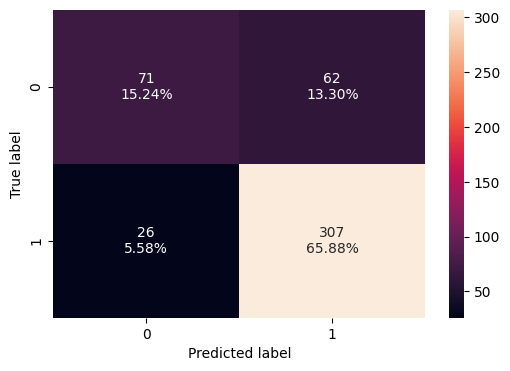

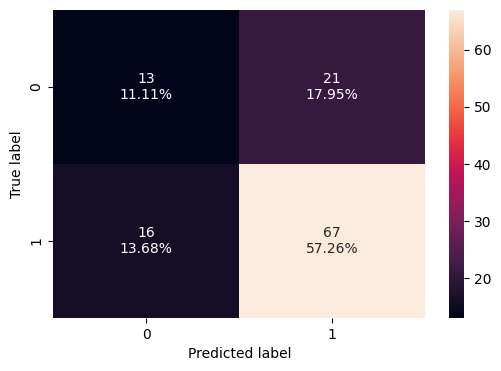

In [102]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, X_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, X_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

#Creating confusion matrix on training set
confusion_matrix_sklearn(ab_classifier,X_train,y_train)
#Creating confusion matrix on testing set
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

 **Tuning AdaBoost Classifier**

In [103]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Use 'estimator' instead of 'base_estimator'
    "estimator": [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data
abc_tuned.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

Training performance:
    Accuracy  Recall  Precision        F1
0  0.714592     1.0   0.714592  0.833542
Testing performance:
    Accuracy  Recall  Precision    F1
0  0.709402     1.0   0.709402  0.83


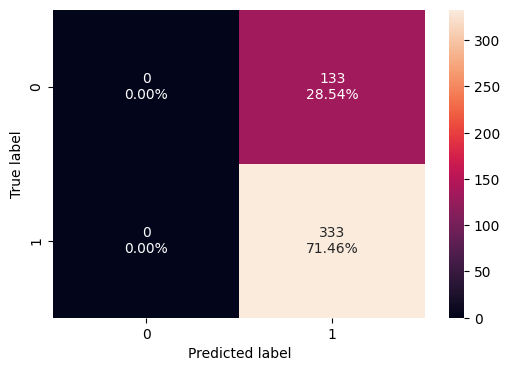

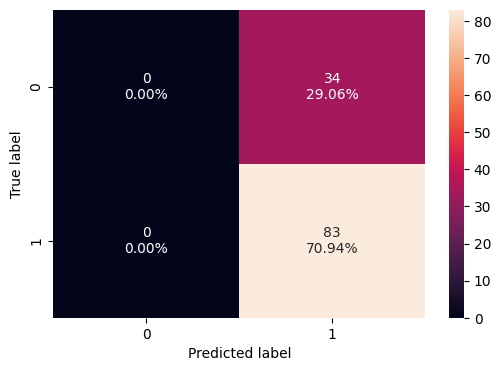

In [104]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, X_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, X_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

#Creating confusion matrix for training
confusion_matrix_sklearn(abc_tuned,X_train,y_train)
#Creating confusion matrix for testing
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

## Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision       F1
0  0.946352  0.993994   0.935028  0.96361
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.65812  0.783133   0.747126  0.764706


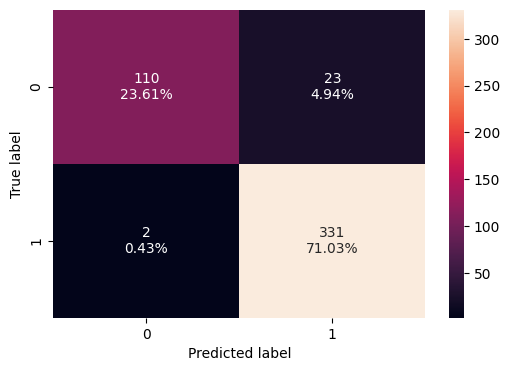

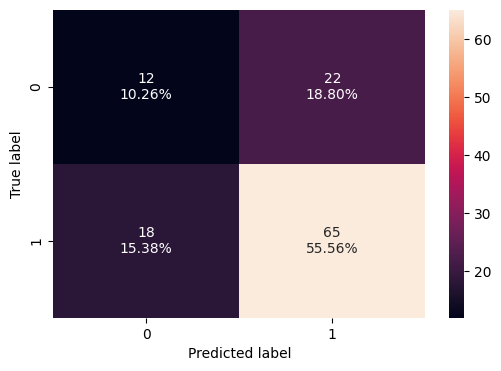

In [105]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix training set
confusion_matrix_sklearn(gb_classifier,X_train,y_train)
#Creating confusion matrix testing set
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

**Tuning Gradient Boosting Classifier**

In [106]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=150, random_state=1,
                           subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.95279  0.993994    0.94302  0.967836
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.675214  0.795181   0.758621  0.776471


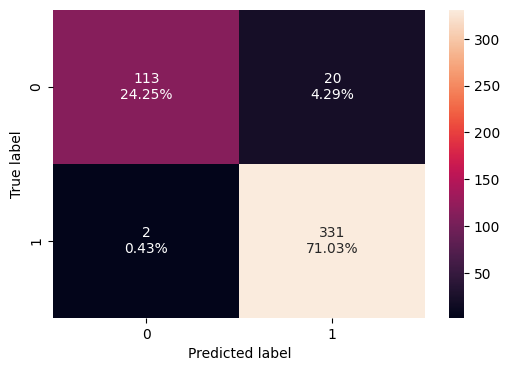

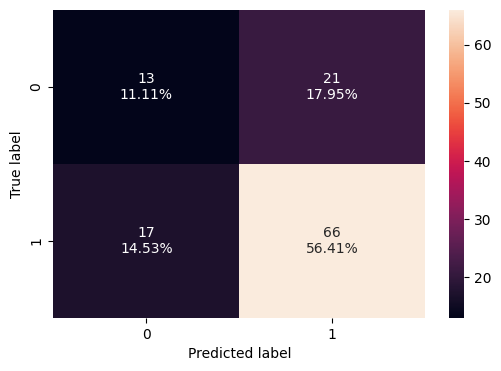

In [107]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix for training
confusion_matrix_sklearn(gbc_tuned,X_train,y_train)
#Creating confusion matrix for testing
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

## Comparing all models

In [108]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_model_train_perf.T,
        decision_tree_tune_perf_train.T,
        pruned_dtree_model_train_perf.T,
        decision_tree_post_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_model_train_perf.T,
        bagging_estimator_model_train_perf.T,
        rf_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Pre-pruned",
    "Decision Tree Pruned",
    "Decision Tree Post-pruned",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Pre-pruned,Decision Tree Pruned,Decision Tree Post-pruned,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,1.0,0.688841,0.714592,0.714592,0.727468,0.997854,0.729614,1.0,0.912017,0.811159,0.714592,0.946352,0.952790
Recall,1.0,0.600601,1.000000,1.000000,1.000000,0.996997,1.000000,1.0,0.993994,0.921922,1.000000,0.993994,0.993994
Precision,1.0,0.943396,0.714592,0.714592,0.723913,1.000000,0.725490,1.0,0.894595,0.831978,0.714592,0.935028,0.943020
F1,1.0,0.733945,0.833542,0.833542,0.839849,0.998496,0.840909,1.0,0.941679,0.874644,0.833542,0.963610,0.967836


In [109]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_model_test_perf.T,
        decision_tree_tune_perf_test.T,
        pruned_dtree_model_test_perf.T,
        decision_tree_post_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_model_test_perf.T,
        bagging_estimator_model_test_perf.T,
        rf_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Pre-pruned",
    "Decision Tree Pruned",
    "Decision Tree Post-pruned",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Pre-pruned,Decision Tree Pruned,Decision Tree Post-pruned,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier
Accuracy,0.564103,0.529915,0.709402,0.709402,0.709402,0.641026,0.709402,0.658120,0.683761,0.683761,0.709402,0.658120,0.675214
Recall,0.662651,0.409639,1.000000,1.000000,1.000000,0.686747,1.000000,0.831325,0.891566,0.807229,1.000000,0.783133,0.795181
Precision,0.705128,0.850000,0.709402,0.709402,0.709402,0.780822,0.709402,0.726316,0.725490,0.761364,0.709402,0.747126,0.758621
F1,0.683230,0.552846,0.830000,0.830000,0.830000,0.730769,0.830000,0.775281,0.800000,0.783626,0.830000,0.764706,0.776471


### Important features of the final model

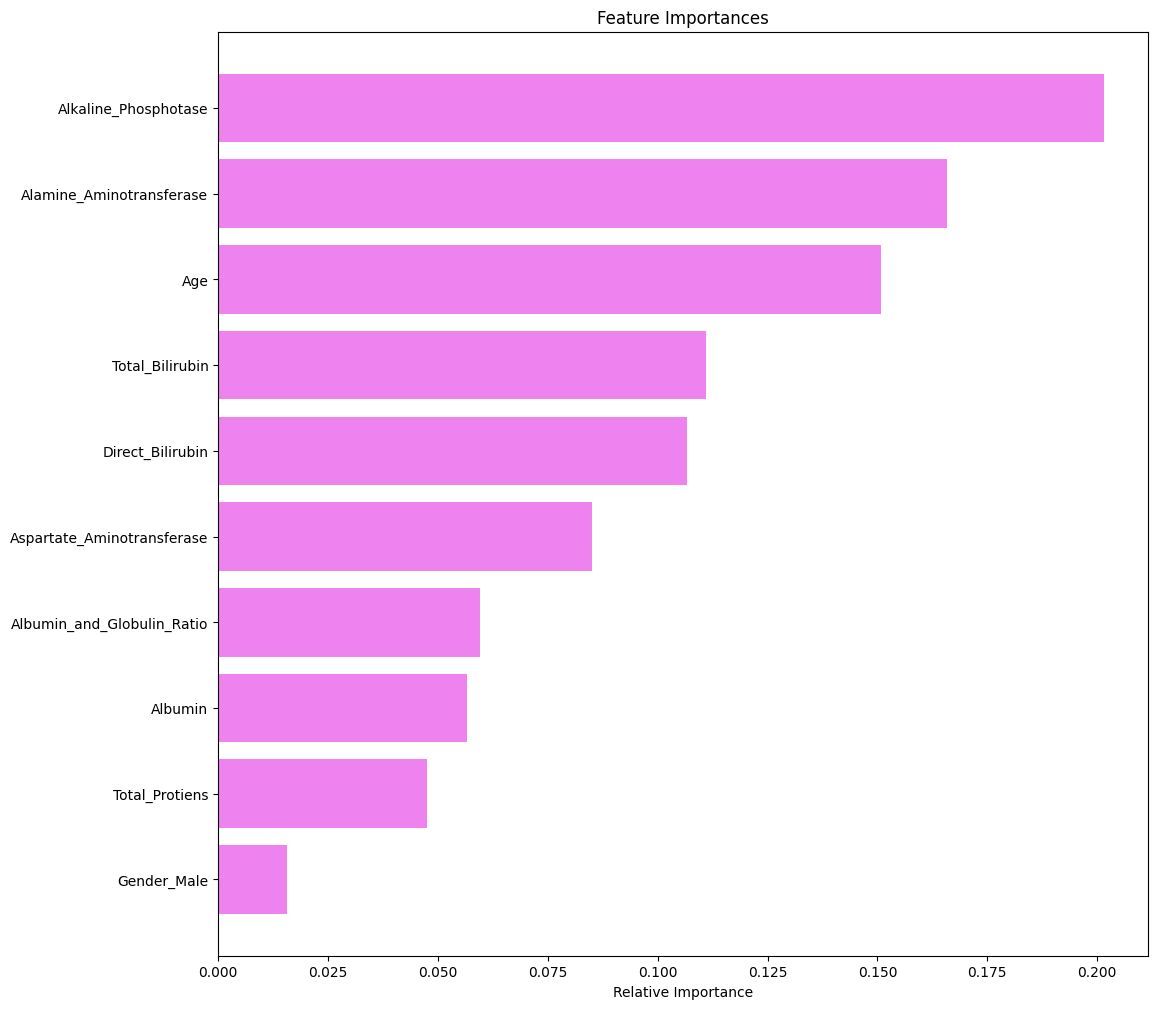

In [110]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations
- We can either select gradient decision tree pruned,decision tree post-pruned,tuned decision tree, tuned bagging classifier or tuned adaboost classifier .
- Decision tree pruned classifier will therefore be chosen for deployment.

## Saving Pruned Decision Tree Classifier Model For Deployment

In [115]:
import joblib
# Save the model to a .pkl file
joblib.dump(pruned_dtree_model, 'model.pkl')


['model.pkl']

In [112]:
#pip freeze

In [113]:
#pip show pandas

In [114]:
#!python --version
